In [1]:
import pandas as pd
from itertools import islice
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

#sn.set_theme(style="white", palette="rocket_r")

# For reproducibility
np.random.seed(42)

In [162]:
diagnoses = pd.read_csv('Data/eICU_data/preprocessed_diagnoses.csv', index_col='patient')

In [3]:
diagnoses

,burns/trauma,burns/trauma|trauma - CNS,burns/trauma|trauma - CNS|intracranial injury,burns/trauma|trauma - skeletal,burns/trauma|trauma - skeletal|bone fracture(s),cardiovascular,cardiovascular|arrhythmias,cardiovascular|arrhythmias|atrial fibrillation,cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response,cardiovascular|arrhythmias|bradycardia,...,Renal (R)|Renal Failure|renal failure - hemodialysis,Renal (R)|Renal Failure|renal failure- not currently dialyzed,Renal (R)|Renal Insufficiency,Renal (R)|Renal Insufficiency|renal insufficiency - baseline creatinine unknown,Renal (R)|Renal Insufficiency|renal insufficiency - creatinine 1-2,Rheumatic,Rheumatic|Rheumatoid Arthritis,No Health Problems,Not Obtainable,Performed
patient,,,,,,,,,,,,,,,,,,,,,
141168,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
141194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
141227,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3353237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3353251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [174]:
len(diagnoses.index.unique())

143924

In [5]:
list(diagnoses.columns)

['burns/trauma',
 'burns/trauma|trauma - CNS',
 'burns/trauma|trauma - CNS|intracranial injury',
 'burns/trauma|trauma - skeletal',
 'burns/trauma|trauma - skeletal|bone fracture(s)',
 'cardiovascular',
 'cardiovascular|arrhythmias',
 'cardiovascular|arrhythmias|atrial fibrillation',
 'cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response',
 'cardiovascular|arrhythmias|bradycardia',
 'cardiovascular|cardiac arrest',
 'cardiovascular|cardiac surgery',
 'cardiovascular|cardiac surgery|s/p CABG < 7 days',
 'cardiovascular|cardiac surgery|valve replacement < 7days',
 'cardiovascular|chest pain / ASHD',
 'cardiovascular|chest pain / ASHD|acute coronary syndrome',
 'cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation)',
 'cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation)',
 'cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA',
 'cardiovascular|chest

In [165]:
# Relevant diagnoses
list_diagnoses = ['cardiovascular|cardiac arrest', 'cardiovascular|chest pain / ASHD|acute coronary syndrome', 
                 'cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation)',
                 'cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation)',
                 'cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA',
                 'cardiovascular|chest pain / ASHD|coronary artery disease',
                 'cardiovascular|chest pain / ASHD|coronary artery disease|known',
                 'Acute MI location', 'Acute MI location|inferior', 'Acute MI location|non-Q',
                 'Non-operative|Diagnosis|Cardiovascular|Cardiac arrest (with or without respiratory arrest; for respiratory arrest see Respiratory System)',
                 'Non-operative|Diagnosis|Cardiovascular|Infarction, acute myocardial (MI)',
                 'Cardiovascular (R)|Myocardial Infarction', 'Cardiovascular (R)|Myocardial Infarction|MI - date unknown',
                 'Cardiovascular (R)|Myocardial Infarction|MI - remote', 'Cardiovascular (R)|Myocardial Infarction|MI - within 6 months']

In [166]:
diagnoses[list_diagnoses]

,cardiovascular|cardiac arrest,cardiovascular|chest pain / ASHD|acute coronary syndrome,cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA,cardiovascular|chest pain / ASHD|coronary artery disease,cardiovascular|chest pain / ASHD|coronary artery disease|known,Acute MI location,Acute MI location|inferior,Acute MI location|non-Q,Non-operative|Diagnosis|Cardiovascular|Cardiac arrest (with or without respiratory arrest; for respiratory arrest see Respiratory System),"Non-operative|Diagnosis|Cardiovascular|Infarction, acute myocardial (MI)",Cardiovascular (R)|Myocardial Infarction,Cardiovascular (R)|Myocardial Infarction|MI - date unknown,Cardiovascular (R)|Myocardial Infarction|MI - remote,Cardiovascular (R)|Myocardial Infarction|MI - within 6 months
patient,,,,,,,,,,,,,,,,
141168,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
141208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353251,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [167]:
diagnoses[list_diagnoses].apply(pd.Series.value_counts)

,cardiovascular|cardiac arrest,cardiovascular|chest pain / ASHD|acute coronary syndrome,cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA,cardiovascular|chest pain / ASHD|coronary artery disease,cardiovascular|chest pain / ASHD|coronary artery disease|known,Acute MI location,Acute MI location|inferior,Acute MI location|non-Q,Non-operative|Diagnosis|Cardiovascular|Cardiac arrest (with or without respiratory arrest; for respiratory arrest see Respiratory System),"Non-operative|Diagnosis|Cardiovascular|Infarction, acute myocardial (MI)",Cardiovascular (R)|Myocardial Infarction,Cardiovascular (R)|Myocardial Infarction|MI - date unknown,Cardiovascular (R)|Myocardial Infarction|MI - remote,Cardiovascular (R)|Myocardial Infarction|MI - within 6 months
0.0,140168,133533,140873,140508,142311,137547,142023,137861,142078,141718,140488,138350,130311,135484,141715,142422
1.0,3756,10391,3051,3416,1613,6377,1901,6063,1846,2206,3436,5574,13613,8440,2209,1502


In [168]:
diagnoses[list_diagnoses] = diagnoses[list_diagnoses].astype('bool')
i = 0
for col in list_diagnoses:
    if i == 0:
        MI_column = diagnoses[col]
    MI_column = MI_column | diagnoses[col]
    i += 1

In [169]:
MI_column.value_counts

<bound method IndexOpsMixin.value_counts of patient
141168      True
141194     False
141203      True
141208     False
141227      True
           ...  
3353235    False
3353237    False
3353251     True
3353254    False
3353263    False
Length: 143924, dtype: bool>

In [170]:
MI_column = MI_column.astype(float)
diagnoses = diagnoses.assign(MI=MI_column)
diagnoses[list_diagnoses] = diagnoses[list_diagnoses].astype('float')

In [171]:
list_diagnoses.append('MI')
diagnoses[list_diagnoses].apply(pd.Series.value_counts)

,cardiovascular|cardiac arrest,cardiovascular|chest pain / ASHD|acute coronary syndrome,cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA,cardiovascular|chest pain / ASHD|coronary artery disease,cardiovascular|chest pain / ASHD|coronary artery disease|known,Acute MI location,Acute MI location|inferior,Acute MI location|non-Q,Non-operative|Diagnosis|Cardiovascular|Cardiac arrest (with or without respiratory arrest; for respiratory arrest see Respiratory System),"Non-operative|Diagnosis|Cardiovascular|Infarction, acute myocardial (MI)",Cardiovascular (R)|Myocardial Infarction,Cardiovascular (R)|Myocardial Infarction|MI - date unknown,Cardiovascular (R)|Myocardial Infarction|MI - remote,Cardiovascular (R)|Myocardial Infarction|MI - within 6 months,MI
0.0,140168,133533,140873,140508,142311,137547,142023,137861,142078,141718,140488,138350,130311,135484,141715,142422,114985
1.0,3756,10391,3051,3416,1613,6377,1901,6063,1846,2206,3436,5574,13613,8440,2209,1502,28939


In [172]:
MI_patients = diagnoses.index[diagnoses['MI'] == 1.0].tolist()

In [173]:
diagnoses

,burns/trauma,burns/trauma|trauma - CNS,burns/trauma|trauma - CNS|intracranial injury,burns/trauma|trauma - skeletal,burns/trauma|trauma - skeletal|bone fracture(s),cardiovascular,cardiovascular|arrhythmias,cardiovascular|arrhythmias|atrial fibrillation,cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response,cardiovascular|arrhythmias|bradycardia,...,Renal (R)|Renal Failure|renal failure- not currently dialyzed,Renal (R)|Renal Insufficiency,Renal (R)|Renal Insufficiency|renal insufficiency - baseline creatinine unknown,Renal (R)|Renal Insufficiency|renal insufficiency - creatinine 1-2,Rheumatic,Rheumatic|Rheumatoid Arthritis,No Health Problems,Not Obtainable,Performed,MI
patient,,,,,,,,,,,,,,,,,,,,,
141168,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
141194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
141208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
141227,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3353237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3353251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [175]:
labels = pd.read_csv('Data/eICU_data/preprocessed_labels.csv', index_col='patient')

In [176]:
list(labels.columns)

['uniquepid',
 'patienthealthsystemstayid',
 'unitvisitnumber',
 'unitdischargeoffset',
 'predictedhospitalmortality',
 'actualhospitalmortality',
 'predictediculos',
 'actualiculos',
 'unitdischargelocation_Acute Care/Floor',
 'unitdischargelocation_Death',
 'unitdischargelocation_Floor',
 'unitdischargelocation_Home',
 'unitdischargelocation_ICU',
 'unitdischargelocation_Nursing Home',
 'unitdischargelocation_Operating Room',
 'unitdischargelocation_Other',
 'unitdischargelocation_Other External',
 'unitdischargelocation_Other Hospital',
 'unitdischargelocation_Other ICU',
 'unitdischargelocation_Other ICU (CABG)',
 'unitdischargelocation_Other Internal',
 'unitdischargelocation_Rehabilitation',
 'unitdischargelocation_Skilled Nursing Facility',
 'unitdischargelocation_Step-Down Unit (SDU)',
 'unitdischargelocation_Telemetry',
 'unitdischargestatus_Alive',
 'unitdischargestatus_Expired']

In [177]:
columns_that_matter = ['unitdischargeoffset', 'predictedhospitalmortality', 'actualhospitalmortality']
labels = labels[columns_that_matter]

In [178]:
labels

,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality
patient,,,
141168,3596,0.059099,1
141194,4813,0.102283,0
141203,1869,0.470973,0
141208,720,0.002249,0
141227,1652,0.488562,0
...,...,...,...
3353235,1069,0.022630,0
3353237,1269,0.062568,0
3353251,16259,0.918169,0


In [179]:
len(labels.index.unique())

148137

In [19]:
labels['actualhospitalmortality'].value_counts()

0    134416
1     13721
Name: actualhospitalmortality, dtype: int64

In [20]:
mergedDf = diagnoses.merge(labels, left_index=True, right_index=True)

In [21]:
mergedDf

,burns/trauma,burns/trauma|trauma - CNS,burns/trauma|trauma - CNS|intracranial injury,burns/trauma|trauma - skeletal,burns/trauma|trauma - skeletal|bone fracture(s),cardiovascular,cardiovascular|arrhythmias,cardiovascular|arrhythmias|atrial fibrillation,cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response,cardiovascular|arrhythmias|bradycardia,...,Renal (R)|Renal Insufficiency|renal insufficiency - creatinine 1-2,Rheumatic,Rheumatic|Rheumatoid Arthritis,No Health Problems,Not Obtainable,Performed,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality
patient,,,,,,,,,,,,,,,,,,,,,
141168,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3596,0.059099,1
141194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4813,0.102283,0
141203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1869,0.470973,0
141208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,720,0.002249,0
141227,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1652,0.488562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1069,0.022630,0
3353237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1269,0.062568,0
3353251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16259,0.918169,0


In [22]:
labels = mergedDf[['MI', 'unitdischargeoffset', 'predictedhospitalmortality', 'actualhospitalmortality']]

In [23]:
labels['MI'] = labels['MI'].astype(int)
labels

/var/folders/rb/zrr_wqjs59v2n19lg6kssgnw0000gr/T/ipykernel_20125/1930642850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['MI'] = labels['MI'].astype(int)


,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality
patient,,,,
141168,1,3596,0.059099,1
141194,0,4813,0.102283,0
141203,1,1869,0.470973,0
141208,0,720,0.002249,0
141227,1,1652,0.488562,0
...,...,...,...,...
3353235,0,1069,0.022630,0
3353237,0,1269,0.062568,0
3353251,1,16259,0.918169,0


In [24]:
matrix = confusion_matrix(labels['MI'], labels['actualhospitalmortality'])

<AxesSubplot:>

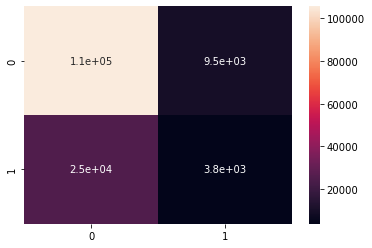

In [25]:
sn.heatmap(matrix, annot=True)

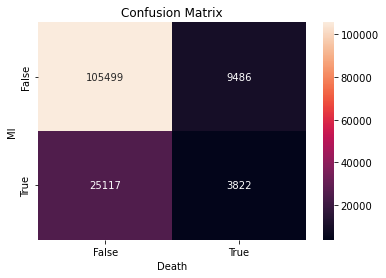

In [26]:
ax= plt.subplot()
sn.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Death');ax.set_ylabel('MI'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

In [27]:
flats = pd.read_csv('Data/eICU_data/preprocessed_flat.csv', index_col='patient')

In [28]:
flats

,gender,age,admissionheight,admissionweight,hour,teachingstatus,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,...,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,region_Midwest,region_Northeast,region_South,region_West,> 89,nullweight,nullheight
patient,,,,,,,,,,,,,,,,,,,,,
141168,0.0,0.379310,-1.232677,-0.143571,0.304348,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
141194,1.0,0.310345,0.799510,-0.403246,-0.391304,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
141203,0.0,0.620690,-0.679107,-0.495630,0.739130,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
141208,0.0,-1.172414,0.245939,0.131086,-0.043478,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
141227,1.0,0.793103,1.170985,-0.196005,0.043478,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,1.0,-0.310345,0.435319,-0.001248,-0.565217,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3353237,0.0,0.689655,-0.489727,-0.290886,-0.913043,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3353251,1.0,0.482759,0.617414,0.298377,0.391304,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [29]:
list(flats.columns)

['gender',
 'age',
 'admissionheight',
 'admissionweight',
 'hour',
 'teachingstatus',
 'ethnicity_African American',
 'ethnicity_Asian',
 'ethnicity_Caucasian',
 'ethnicity_Hispanic',
 'ethnicity_Native American',
 'ethnicity_Other/Unknown',
 'unittype_CCU-CTICU',
 'unittype_CSICU',
 'unittype_CTICU',
 'unittype_Cardiac ICU',
 'unittype_MICU',
 'unittype_Med-Surg ICU',
 'unittype_Neuro ICU',
 'unittype_SICU',
 'unitadmitsource_Acute Care/Floor',
 'unitadmitsource_Direct Admit',
 'unitadmitsource_Emergency Department',
 'unitadmitsource_Floor',
 'unitadmitsource_Operating Room',
 'unitadmitsource_Other Hospital',
 'unitadmitsource_PACU',
 'unitadmitsource_Recovery Room',
 'unitadmitsource_Step-Down Unit (SDU)',
 'unitadmitsource_misc',
 'unitvisitnumber_1',
 'unitvisitnumber_2',
 'unitvisitnumber_3',
 'unitvisitnumber_misc',
 'unitstaytype_admit',
 'unitstaytype_readmit',
 'unitstaytype_transfer',
 'physicianspeciality_Specialty Not Specified',
 'physicianspeciality_cardiology',
 'phys

In [30]:
flats['> 89'].value_counts()

0    142938
1      5199
Name: > 89, dtype: int64

In [31]:
flats = flats[flats['> 89'] != 1]

In [32]:
flats = flats.drop(['nullweight', 'nullheight', '> 89'], axis=1)

In [33]:
final = labels.merge(flats, left_index=True, right_index=True)

In [34]:
final

,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality,gender,age,admissionheight,admissionweight,hour,teachingstatus,...,physicianspeciality_surgery-vascular,physicianspeciality_unknown,numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,region_Midwest,region_Northeast,region_South,region_West
patient,,,,,,,,,,,,,,,,,,,,,
141168,1,3596,0.059099,1,0.0,0.379310,-1.232677,-0.143571,0.304348,0,...,0,0,0,0,1,0,1,0,0,0
141194,0,4813,0.102283,0,1.0,0.310345,0.799510,-0.403246,-0.391304,1,...,0,0,0,0,0,1,1,0,0,0
141203,1,1869,0.470973,0,0.0,0.620690,-0.679107,-0.495630,0.739130,0,...,0,0,1,0,0,0,1,0,0,0
141208,0,720,0.002249,0,0.0,-1.172414,0.245939,0.131086,-0.043478,1,...,0,0,0,0,0,1,1,0,0,0
141227,1,1652,0.488562,0,1.0,0.793103,1.170985,-0.196005,0.043478,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,0,1069,0.022630,0,1.0,-0.310345,0.435319,-0.001248,-0.565217,0,...,0,0,0,0,0,1,0,0,1,0
3353237,0,1269,0.062568,0,0.0,0.689655,-0.489727,-0.290886,-0.913043,0,...,0,0,0,0,0,1,0,0,1,0
3353251,1,16259,0.918169,0,1.0,0.482759,0.617414,0.298377,0.391304,0,...,0,0,0,0,0,1,0,0,1,0


In [35]:
diagnoses_post = pd.read_csv('Data/eICU_data/preprocessed_diagnoses_post.csv', index_col='patient')

In [36]:
diagnoses_post

,burns/trauma,burns/trauma|trauma - CNS,burns/trauma|trauma - CNS|intracranial injury,burns/trauma|trauma - skeletal,burns/trauma|trauma - skeletal|bone fracture(s),cardiovascular,cardiovascular|arrhythmias,cardiovascular|arrhythmias|atrial fibrillation,cardiovascular|arrhythmias|atrial fibrillation|with controlled ventricular response,cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response,...,renal|electrolyte imbalance|hypokalemia,renal|electrolyte imbalance|hypomagnesemia,renal|electrolyte imbalance|hyponatremia,renal|electrolyte imbalance|hypophosphatemia,renal|fluid imbalance,renal|fluid imbalance|hypovolemia,surgery,toxicology,toxicology|drug overdose,toxicology|drug overdose|drug overdose- general
patient,,,,,,,,,,,,,,,,,,,,,
141203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141288,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141436,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141515,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353201,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3353216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
list(diagnoses_post.columns)

['burns/trauma',
 'burns/trauma|trauma - CNS',
 'burns/trauma|trauma - CNS|intracranial injury',
 'burns/trauma|trauma - skeletal',
 'burns/trauma|trauma - skeletal|bone fracture(s)',
 'cardiovascular',
 'cardiovascular|arrhythmias',
 'cardiovascular|arrhythmias|atrial fibrillation',
 'cardiovascular|arrhythmias|atrial fibrillation|with controlled ventricular response',
 'cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response',
 'cardiovascular|arrhythmias|bradycardia',
 'cardiovascular|arrhythmias|sinus tachycardia',
 'cardiovascular|arrhythmias|ventricular tachycardia',
 'cardiovascular|cardiac arrest',
 'cardiovascular|cardiac arrest|cardiac arrest|witnessed, < 15 minutes CPR',
 'cardiovascular|cardiac surgery',
 'cardiovascular|cardiac surgery|CABG < 7days',
 'cardiovascular|cardiac surgery|s/p CABG < 7 days',
 'cardiovascular|cardiac surgery|valve replacement < 7days',
 'cardiovascular|cardiac surgery|valve replacement < 7days|aortic',
 'cardiovascular|ches

There is no: 'Acute MI location', 'Acute MI location|inferior', 'Acute MI location|non-Q', 'Non-operative|Diagnosis|Cardiovascular|Cardiac arrest (with or without respiratory arrest; for respiratory arrest see Respiratory System)',
                 'Non-operative|Diagnosis|Cardiovascular|Infarction, acute myocardial (MI)',
                 'Cardiovascular (R)|Myocardial Infarction', 'Cardiovascular (R)|Myocardial Infarction|MI - date unknown',
                 'Cardiovascular (R)|Myocardial Infarction|MI - remote', 'Cardiovascular (R)|Myocardial Infarction|MI - within 6 months'

In [38]:
# Relevant diagnoses
list_diagnoses = ['cardiovascular|cardiac arrest', 'cardiovascular|chest pain / ASHD|acute coronary syndrome', 
                 'cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation)',
                 'cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation)',
                 'cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA',
                 'cardiovascular|chest pain / ASHD|coronary artery disease',
                 'cardiovascular|chest pain / ASHD|coronary artery disease|known']

In [39]:
diagnoses_post[list_diagnoses].apply(pd.Series.value_counts)

,cardiovascular|cardiac arrest,cardiovascular|chest pain / ASHD|acute coronary syndrome,cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA,cardiovascular|chest pain / ASHD|coronary artery disease,cardiovascular|chest pain / ASHD|coronary artery disease|known
0.0,68194,64381,68841,69631,70637,66589,69673
1.0,3329,7142,2682,1892,886,4934,1850


In [40]:
diagnoses_post[list_diagnoses] = diagnoses_post[list_diagnoses].astype('bool')
i = 0
for col in list_diagnoses:
    if i == 0:
        MI_column = diagnoses_post[col]
    MI_column = MI_column | diagnoses_post[col]
    i += 1

In [41]:
MI_column = MI_column.astype(float)
diagnoses_post = diagnoses_post.assign(post_MI=MI_column)
diagnoses_post[list_diagnoses] = diagnoses_post[list_diagnoses].astype('float')

In [42]:
list_diagnoses.append('post_MI')
diagnoses_post[list_diagnoses].apply(pd.Series.value_counts)

,cardiovascular|cardiac arrest,cardiovascular|chest pain / ASHD|acute coronary syndrome,cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (no ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|acute myocardial infarction (with ST elevation),cardiovascular|chest pain / ASHD|acute coronary syndrome|s/p PTCA,cardiovascular|chest pain / ASHD|coronary artery disease,cardiovascular|chest pain / ASHD|coronary artery disease|known,post_MI
0.0,68194,64381,68841,69631,70637,66589,69673,58101
1.0,3329,7142,2682,1892,886,4934,1850,13422


In [43]:
diagnoses_post

,burns/trauma,burns/trauma|trauma - CNS,burns/trauma|trauma - CNS|intracranial injury,burns/trauma|trauma - skeletal,burns/trauma|trauma - skeletal|bone fracture(s),cardiovascular,cardiovascular|arrhythmias,cardiovascular|arrhythmias|atrial fibrillation,cardiovascular|arrhythmias|atrial fibrillation|with controlled ventricular response,cardiovascular|arrhythmias|atrial fibrillation|with rapid ventricular response,...,renal|electrolyte imbalance|hypomagnesemia,renal|electrolyte imbalance|hyponatremia,renal|electrolyte imbalance|hypophosphatemia,renal|fluid imbalance,renal|fluid imbalance|hypovolemia,surgery,toxicology,toxicology|drug overdose,toxicology|drug overdose|drug overdose- general,post_MI
patient,,,,,,,,,,,,,,,,,,,,,
141203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141288,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141436,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141515,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353201,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3353216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
mergedDf = diagnoses_post['post_MI'].to_frame().merge(final, left_index=True, right_index=True)
mergedDf['post_MI'] = mergedDf['post_MI'].astype(int)

In [45]:
mergedDf

,post_MI,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality,gender,age,admissionheight,admissionweight,hour,...,physicianspeciality_surgery-vascular,physicianspeciality_unknown,numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,region_Midwest,region_Northeast,region_South,region_West
patient,,,,,,,,,,,,,,,,,,,,,
141203,1,1,1869,0.470973,0,0.0,0.620690,-0.679107,-0.495630,0.739130,...,0,0,1,0,0,0,1,0,0,0
141284,0,0,2076,0.034714,0,1.0,0.137931,1.360364,0.000000,1.000000,...,0,0,0,0,0,1,1,0,0,0
141288,1,0,1631,0.026199,0,0.0,0.068966,-0.489727,0.000000,0.739130,...,0,0,0,0,0,0,1,0,0,0
141436,1,1,2167,0.108486,0,1.0,-0.448276,-0.125536,-0.435705,-0.652174,...,0,0,0,0,0,1,1,0,0,0
141515,0,0,8882,0.596415,1,0.0,0.310345,-0.307632,-0.478152,0.130435,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353201,0,0,5825,-1.000000,0,0.0,0.241379,-0.861202,-0.463171,0.130435,...,0,0,0,0,0,1,0,0,1,0
3353213,0,0,4913,0.052999,0,0.0,-0.275862,-0.679107,-0.890137,-0.391304,...,0,0,0,0,0,1,0,0,1,0
3353216,0,0,3090,0.020907,0,0.0,-0.310345,-0.307632,-0.865169,0.652174,...,0,0,0,0,0,1,0,0,1,0


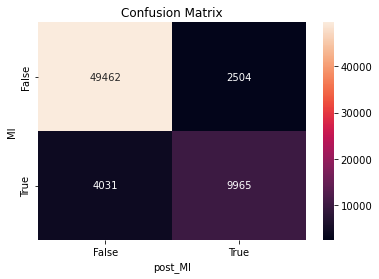

In [46]:
matrix = confusion_matrix(mergedDf['MI'], mergedDf['post_MI'])

ax= plt.subplot()
sn.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('post_MI');ax.set_ylabel('MI'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

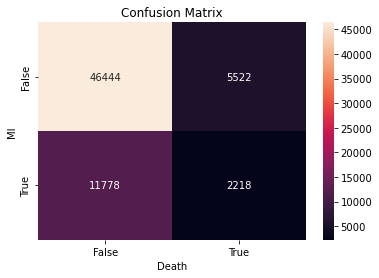

In [49]:
matrix = confusion_matrix(mergedDf['MI'], mergedDf['actualhospitalmortality'])

ax= plt.subplot()
sn.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Death');ax.set_ylabel('MI'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

In [115]:
timeseries_resp = pd.read_csv('Data/eICU_data/timeseries_resp.csv', index_col=['patient', 'time'])

In [64]:
timeseries_resp

Exhaled MV  Exhaled TV (patient)  FiO2  LPM O2  \
patient time                                                                
141168  0 days 06:36:00           NaN                   NaN   NaN     4.0   
        0 days 09:23:00           NaN                   NaN   NaN     4.0   
        0 days 10:06:00           NaN                   NaN   NaN     4.0   
        0 days 11:06:00           NaN                   NaN   NaN     4.0   
        0 days 12:06:00           NaN                   NaN   NaN     4.0   
...                               ...                   ...   ...     ...   
3353251 7 days 21:43:00           NaN                   NaN  40.0     NaN   
        7 days 22:23:00           NaN                 525.0  40.0     NaN   
        7 days 22:43:00           NaN                   NaN  40.0     NaN   
3353254 -1 days +20:21:00         NaN                   NaN   NaN     NaN   
        0 days 01:59:00           NaN                   NaN   NaN     NaN   

                           Mean Airway Pressure  PEEP  Peak Insp. Pressure  \
patient time                                                                 
141168  0 days 06:36:00                     NaN   NaN                  NaN   
        0 days 09:23:00                     NaN   NaN                  NaN   
        0 days 10:06:00                     NaN   NaN                  NaN   
        0 days 11:06:00                     NaN   NaN                  NaN   
        0 days 12:06:00                     NaN   NaN                  NaN   
...                                         ...   ...                  ...   
3353251 7 days 21:43:00                     NaN   8.0                  NaN   
        7 days 22:23:00                     NaN   8.0                 16.0   
        7 days 22:43:00                     NaN   8.0                  NaN   
3353254 -1 days +20:21:00                   NaN   NaN                  NaN   
        0 days 01:59:00                     NaN   NaN                  NaN   

                           Plateau Pressure  Pressure Support  RR (patient)  \
patient time                                                                  
141168  0 days 06:36:00                 NaN               NaN           NaN   
        0 days 09:23:00                 NaN               NaN           NaN   
        0 days 10:06:00                 NaN               NaN           NaN   
        0 days 11:06:00                 NaN               NaN           NaN   
        0 days 12:06:00                 NaN               NaN           NaN   
...                                     ...               ...           ...   
3353251 7 days 21:43:00                 NaN               NaN           NaN   
        7 days 22:23:00                 NaN               7.0           NaN   
        7 days 22:43:00                 NaN               7.0           NaN   
3353254 -1 days +20:21:00               NaN               NaN           NaN   
        0 days 01:59:00                 NaN               NaN           NaN   

                           SaO2  TV/kg IBW  Tidal Volume (set)  Total RR  \
patient time                                                               
141168  0 days 06:36:00     NaN        NaN                 NaN       NaN   
        0 days 09:23:00     NaN        NaN                 NaN       NaN   
        0 days 10:06:00     NaN        NaN                 NaN       NaN   
        0 days 11:06:00     NaN        NaN                 NaN       NaN   
        0 days 12:06:00     NaN        NaN                 NaN       NaN   
...                         ...        ...                 ...       ...   
3353251 7 days 21:43:00     NaN        NaN                 NaN       NaN   
        7 days 22:23:00     NaN        NaN                 NaN       NaN   
        7 days 22:43:00     NaN        NaN                 NaN       NaN   
3353254 -1 days +20:21:00   NaN      79.90                 NaN       NaN   
        0 days 01:59:00     NaN      80.42                 NaN       N

In [65]:
quantiles = timeseries_resp.quantile([0.05, 0.95])
maxs = quantiles.loc[0.95]
mins = quantiles.loc[0.05]

timeseries_resp = 2 * (timeseries_resp - mins) / (maxs - mins) - 1

# we then need to make sure that ridiculous outliers are clipped to something sensible
timeseries_resp.clip(lower=-4, upper=4, inplace=True)  # room for +- 3 on each side, as variables are scaled roughly between 0 and 1

In [67]:
timeseries_resp = timeseries_resp.groupby(level=[0, 1]).mean()

# Round up the time-stamps to the next hour
timeseries_resp.reset_index(level=1, inplace=True)
start = pd.to_datetime('2000-01-01 00:00:00')
timeseries_resp.time = pd.to_timedelta(timeseries_resp.time, errors='coerce') + start
timeseries_resp.time = timeseries_resp.time.dt.ceil(freq='H')
timeseries_resp.time = timeseries_resp.time - start
timeseries_resp.time = pd.to_timedelta(timeseries_resp.time, unit='T')
timeseries_resp.set_index('time', append=True, inplace=True)
timeseries_resp.reset_index(level=0, inplace=True)
resampled = timeseries_resp.groupby('patient').resample('H', closed='right', label='right').mean().drop(columns='patient')

In [68]:
# carry forward missing values (note they will still be 0 in the nulls table)
resampled = resampled.fillna(method='ffill')

In [70]:
# simplify the index
resampled = resampled.rename(index=dict(zip(resampled.index.levels[1],
                                                resampled.index.levels[1].days*24 +
                                                resampled.index.levels[1].seconds//3600)))

In [71]:
resampled

Exhaled MV  Exhaled TV (patient)  FiO2    LPM O2  \
patient time                                                     
141168   7           NaN                   NaN   NaN -0.870130   
         8           NaN                   NaN   NaN -0.870130   
         9           NaN                   NaN   NaN -0.870130   
         10          NaN                   NaN   NaN -0.870130   
         11          NaN                   NaN   NaN -0.870130   
...                  ...                   ...   ...       ...   
3353254 -2     -0.638889               0.11501  -0.6 -0.974026   
        -1     -0.638889               0.11501  -0.6 -0.974026   
         0     -0.638889               0.11501  -0.6 -0.974026   
         1     -0.638889               0.11501  -0.6 -0.974026   
         2     -0.638889               0.11501  -0.6 -0.974026   

              Mean Airway Pressure      PEEP  Peak Insp. Pressure  \
patient time                                                        
141168   7                     NaN       NaN                  NaN   
         8                     NaN       NaN                  NaN   
         9                     NaN       NaN                  NaN   
         10                    NaN       NaN                  NaN   
         11                    NaN       NaN                  NaN   
...                            ...       ...                  ...   
3353254 -2                0.538462 -0.142857                -0.76   
        -1                0.538462 -0.142857                -0.76   
         0                0.538462 -0.142857                -0.76   
         1                0.538462 -0.142857                -0.76   
         2                0.538462 -0.142857                -0.76   

              Plateau Pressure  Pressure Support  RR (patient)  SaO2  \
patient time                                                           
141168   7                 NaN               NaN           NaN   NaN   
         8                 NaN               NaN           NaN   NaN   
         9                 NaN               NaN           NaN   NaN   
         10                NaN               NaN           NaN   NaN   
         11                NaN               NaN           NaN   NaN   
...                        ...               ...           ...   ...   
3353254 -2                -1.0         -0.222222      0.368421   0.0   
        -1                -1.0         -0.222222      0.368421   0.0   
         0                -1.0         -0.222222      0.368421   0.0   
         1                -1.0         -0.222222      0.368421   0.0   
         2                -1.0         -0.222222      0.368421   0.0   

              TV/kg IBW  Tidal Volume (set)  Total RR  Vent Rate  
patient time                                                      
141168   7          NaN                 NaN       NaN        NaN  
         8          NaN                 NaN       NaN        NaN  
         9          NaN                 NaN       NaN        NaN  
         10         NaN                 NaN       NaN        NaN  
         11         NaN                 NaN       NaN        NaN  
...                 ...                 ...       ...        ...  
3353254 -2          4.0                -0.2      -0.3  -2.111111  
        -1          4.0                -0.2      -0.3  -2.111111  
         0          4.0                -0.2      -0.3  -2.111111  
         1          4.0                -0.2      -0.3  -2.111111  
         2          4.0                -0.2      -0.3  -2.111111  

[6117250 rows x 15 columns]

In [72]:
length_limit=24*14
# clip to length_limit
within_length_limit = resampled.index.get_level_values(1) < length_limit
resampled = resampled.loc[within_length_limit]

In [74]:
# Fill in remaining values with 0
resampled.fillna(0, inplace=True)

/var/folders/rb/zrr_wqjs59v2n19lg6kssgnw0000gr/T/ipykernel_20125/4000410348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled.fillna(0, inplace=True)


In [76]:
resampled.to_csv('Data/eICU_data/preprocessed_timeseries_resp.csv', mode='a', header=True)

In [78]:
# Unique patients with resp variables
resampled.index.unique(level=0)

Int64Index([ 141168,  141194,  141203,  141227,  141233,  141244,  141260,
             141265,  141266,  141276,
            ...
            3353184, 3353194, 3353198, 3353200, 3353201, 3353213, 3353216,
            3353226, 3353251, 3353254],
           dtype='int64', name='patient', length=87163)

In [82]:
resampled

Exhaled MV  Exhaled TV (patient)  FiO2    LPM O2  \
patient time                                                     
141168   7      0.000000               0.00000   0.0 -0.870130   
         8      0.000000               0.00000   0.0 -0.870130   
         9      0.000000               0.00000   0.0 -0.870130   
         10     0.000000               0.00000   0.0 -0.870130   
         11     0.000000               0.00000   0.0 -0.870130   
...                  ...                   ...   ...       ...   
3353254 -2     -0.638889               0.11501  -0.6 -0.974026   
        -1     -0.638889               0.11501  -0.6 -0.974026   
         0     -0.638889               0.11501  -0.6 -0.974026   
         1     -0.638889               0.11501  -0.6 -0.974026   
         2     -0.638889               0.11501  -0.6 -0.974026   

              Mean Airway Pressure      PEEP  Peak Insp. Pressure  \
patient time                                                        
141168   7                0.000000  0.000000                 0.00   
         8                0.000000  0.000000                 0.00   
         9                0.000000  0.000000                 0.00   
         10               0.000000  0.000000                 0.00   
         11               0.000000  0.000000                 0.00   
...                            ...       ...                  ...   
3353254 -2                0.538462 -0.142857                -0.76   
        -1                0.538462 -0.142857                -0.76   
         0                0.538462 -0.142857                -0.76   
         1                0.538462 -0.142857                -0.76   
         2                0.538462 -0.142857                -0.76   

              Plateau Pressure  Pressure Support  RR (patient)  SaO2  \
patient time                                                           
141168   7                 0.0          0.000000      0.000000   0.0   
         8                 0.0          0.000000      0.000000   0.0   
         9                 0.0          0.000000      0.000000   0.0   
         10                0.0          0.000000      0.000000   0.0   
         11                0.0          0.000000      0.000000   0.0   
...                        ...               ...           ...   ...   
3353254 -2                -1.0         -0.222222      0.368421   0.0   
        -1                -1.0         -0.222222      0.368421   0.0   
         0                -1.0         -0.222222      0.368421   0.0   
         1                -1.0         -0.222222      0.368421   0.0   
         2                -1.0         -0.222222      0.368421   0.0   

              TV/kg IBW  Tidal Volume (set)  Total RR  Vent Rate  
patient time                                                      
141168   7          0.0                 0.0       0.0   0.000000  
         8          0.0                 0.0       0.0   0.000000  
         9          0.0                 0.0       0.0   0.000000  
         10         0.0                 0.0       0.0   0.000000  
         11         0.0                 0.0       0.0   0.000000  
...                 ...                 ...       ...        ...  
3353254 -2          4.0                -0.2      -0.3  -2.111111  
        -1          4.0                -0.2      -0.3  -2.111111  
         0          4.0                -0.2      -0.3  -2.111111  
         1          4.0                -0.2      -0.3  -2.111111  
         2          4.0                -0.2      -0.3  -2.111111  

[5584566 rows x 15 columns]

In [90]:
df_mean = pd.concat({'mean': resampled.groupby(level=0, axis=0).mean()}, axis=1).swaplevel(axis=1)

In [91]:
df_mean.columns = df_mean.columns.droplevel(level = 1)

In [93]:
df_mean = df_mean.add_suffix('_mean')

In [94]:
df_mean

,Exhaled MV_mean,Exhaled TV (patient)_mean,FiO2_mean,LPM O2_mean,Mean Airway Pressure_mean,PEEP_mean,Peak Insp. Pressure_mean,Plateau Pressure_mean,Pressure Support_mean,RR (patient)_mean,SaO2_mean,TV/kg IBW_mean,Tidal Volume (set)_mean,Total RR_mean,Vent Rate_mean
patient,,,,,,,,,,,,,,,
141168,0.000000,0.000000,0.191919,-0.870130,0.000000,-0.212121,0.000000,0.050505,0.000000,0.000000,0.0,0.024839,-0.139394,-0.042424,0.023569
141194,0.000000,0.000000,1.000000,-0.974026,0.000000,-1.000000,0.000000,0.333333,0.000000,0.000000,0.0,-0.236062,-1.000000,-0.200000,0.111111
141203,0.000000,0.000000,0.449462,-0.974026,0.000000,-1.000000,0.000000,0.333333,0.000000,0.000000,0.0,-0.236062,-1.000000,-0.200000,0.111111
141227,0.000000,0.000000,-0.785714,-0.435993,0.000000,-1.000000,0.000000,0.295918,0.000000,0.000000,0.0,-0.255252,-0.957143,-0.221429,0.087302
141233,0.000000,0.000000,-0.593004,-0.881433,0.000000,-0.976852,0.000000,-0.869489,-0.099794,0.000000,0.0,-0.428164,-0.525926,-0.460185,-1.179012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353213,-0.444775,-0.333333,-0.398095,-0.974026,-0.336264,-1.000000,0.116952,-1.000000,1.222222,0.338346,0.0,0.267929,-0.200000,0.084286,-2.111111
3353216,-0.712560,-0.033816,-0.449275,-0.974026,-0.478261,-1.000000,-0.544348,-1.000000,0.990338,0.368421,0.0,0.100821,-0.200000,-0.408696,-2.111111
3353226,-0.684576,-0.308074,-0.544327,-0.974026,-0.166802,-0.845113,0.125263,-1.000000,0.387135,0.368421,0.0,0.100821,-0.200000,-0.278947,-2.111111


In [95]:
df_std = pd.concat({'std': resampled.groupby(level=0, axis=0).std()}, axis=1).swaplevel(axis=1)

In [96]:
df_std.columns = df_std.columns.droplevel(level = 1)

In [97]:
df_std = df_std.add_suffix('_std')

In [98]:
df_std

,Exhaled MV_std,Exhaled TV (patient)_std,FiO2_std,LPM O2_std,Mean Airway Pressure_std,PEEP_std,Peak Insp. Pressure_std,Plateau Pressure_std,Pressure Support_std,RR (patient)_std,SaO2_std,TV/kg IBW_std,Tidal Volume (set)_std,Total RR_std,Vent Rate_std
patient,,,,,,,,,,,,,,,
141168,0.000000,0.000000,0.433256,1.962616e-17,0.000000,0.415149,0.000000,0.121370,0.000000,0.000000,0.0,0.196826,0.329715,0.083030,0.046128
141194,0.000000,0.000000,0.000000,2.085746e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
141203,0.000000,0.000000,0.671751,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
141227,0.000000,0.000000,0.358027,2.404431e-01,0.000000,0.000000,0.000000,0.197981,0.000000,0.000000,0.0,0.101545,0.226779,0.113389,0.125988
141233,0.000000,0.000000,0.086513,2.173222e-01,0.000000,0.340207,0.000000,0.101119,0.076441,0.000000,0.0,0.191111,0.232427,0.190929,0.137099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353213,0.238199,0.000000,0.255392,0.000000e+00,0.441135,0.000000,0.423260,0.000000,0.000000,0.177927,0.0,0.728155,0.000000,0.388960,0.000000
3353216,0.109396,0.542287,0.384139,0.000000e+00,0.211245,0.000000,0.303851,0.000000,0.516738,0.000000,0.0,0.000000,0.000000,0.252106,0.000000
3353226,0.196152,0.173831,0.108283,0.000000e+00,0.264382,0.325076,0.374326,0.000000,0.594653,0.000000,0.0,0.000000,0.000000,0.370298,0.000000


In [99]:
resp = df_mean.merge(df_std, left_index=True, right_index=True)

In [100]:
resp

,Exhaled MV_mean,Exhaled TV (patient)_mean,FiO2_mean,LPM O2_mean,Mean Airway Pressure_mean,PEEP_mean,Peak Insp. Pressure_mean,Plateau Pressure_mean,Pressure Support_mean,RR (patient)_mean,...,PEEP_std,Peak Insp. Pressure_std,Plateau Pressure_std,Pressure Support_std,RR (patient)_std,SaO2_std,TV/kg IBW_std,Tidal Volume (set)_std,Total RR_std,Vent Rate_std
patient,,,,,,,,,,,,,,,,,,,,,
141168,0.000000,0.000000,0.191919,-0.870130,0.000000,-0.212121,0.000000,0.050505,0.000000,0.000000,...,0.415149,0.000000,0.121370,0.000000,0.000000,0.0,0.196826,0.329715,0.083030,0.046128
141194,0.000000,0.000000,1.000000,-0.974026,0.000000,-1.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
141203,0.000000,0.000000,0.449462,-0.974026,0.000000,-1.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
141227,0.000000,0.000000,-0.785714,-0.435993,0.000000,-1.000000,0.000000,0.295918,0.000000,0.000000,...,0.000000,0.000000,0.197981,0.000000,0.000000,0.0,0.101545,0.226779,0.113389,0.125988
141233,0.000000,0.000000,-0.593004,-0.881433,0.000000,-0.976852,0.000000,-0.869489,-0.099794,0.000000,...,0.340207,0.000000,0.101119,0.076441,0.000000,0.0,0.191111,0.232427,0.190929,0.137099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353213,-0.444775,-0.333333,-0.398095,-0.974026,-0.336264,-1.000000,0.116952,-1.000000,1.222222,0.338346,...,0.000000,0.423260,0.000000,0.000000,0.177927,0.0,0.728155,0.000000,0.388960,0.000000
3353216,-0.712560,-0.033816,-0.449275,-0.974026,-0.478261,-1.000000,-0.544348,-1.000000,0.990338,0.368421,...,0.000000,0.303851,0.000000,0.516738,0.000000,0.0,0.000000,0.000000,0.252106,0.000000
3353226,-0.684576,-0.308074,-0.544327,-0.974026,-0.166802,-0.845113,0.125263,-1.000000,0.387135,0.368421,...,0.325076,0.374326,0.000000,0.594653,0.000000,0.0,0.000000,0.000000,0.370298,0.000000


In [108]:
final = mergedDf.merge(resp, left_index=True, right_index=True)

In [109]:
final

,post_MI,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality,gender,age,admissionheight,admissionweight,hour,...,PEEP_std,Peak Insp. Pressure_std,Plateau Pressure_std,Pressure Support_std,RR (patient)_std,SaO2_std,TV/kg IBW_std,Tidal Volume (set)_std,Total RR_std,Vent Rate_std
patient,,,,,,,,,,,,,,,,,,,,,
141203,1,1,1869,0.470973,0,0.0,0.620690,-0.679107,-0.495630,0.739130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
141288,1,0,1631,0.026199,0,0.0,0.068966,-0.489727,0.000000,0.739130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
141436,1,1,2167,0.108486,0,1.0,-0.448276,-0.125536,-0.435705,-0.652174,...,0.328798,0.000000,0.074907,0.000000,0.000000,0.0,0.063822,0.065760,0.611710,0.422726
141515,0,0,8882,0.596415,1,0.0,0.310345,-0.307632,-0.478152,0.130435,...,0.356425,0.000000,0.462581,0.000000,0.000000,0.0,0.133303,0.137829,0.489863,0.093484
141585,0,0,40757,-1.000000,0,1.0,0.137931,1.170985,1.162297,0.043478,...,0.000000,0.000000,0.319687,0.366645,0.000000,0.0,0.476931,0.428010,0.199023,0.184364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353201,0,0,5825,-1.000000,0,0.0,0.241379,-0.861202,-0.463171,0.130435,...,0.284926,0.121470,0.000000,0.334380,0.000000,0.0,0.000000,0.000000,0.292134,0.000000
3353213,0,0,4913,0.052999,0,0.0,-0.275862,-0.679107,-0.890137,-0.391304,...,0.000000,0.423260,0.000000,0.000000,0.177927,0.0,0.728155,0.000000,0.388960,0.000000
3353216,0,0,3090,0.020907,0,0.0,-0.310345,-0.307632,-0.865169,0.652174,...,0.000000,0.303851,0.000000,0.516738,0.000000,0.0,0.000000,0.000000,0.252106,0.000000


In [110]:
final['unitdischargeoffset'] = final['unitdischargeoffset']/60

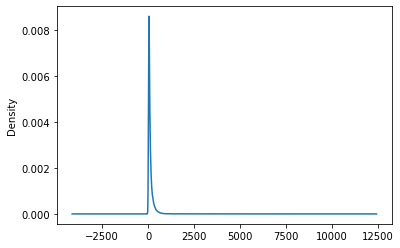

In [111]:
ax = final['unitdischargeoffset'].plot.kde()

In [112]:
timeseries_lab = pd.read_csv('Data/eICU_data/timeseries_lab.csv', index_col=['patient', 'time'])

In [113]:
timeseries_lab

-basos  -eos  -lymphs  -monos  -polys  ALT (SGPT)  \
patient time                                                                   
141168  0 days 03:51:00       NaN   NaN      NaN     NaN     NaN         NaN   
        0 days 08:36:00       0.0   1.0     19.0    19.0    61.0        40.0   
        0 days 18:53:00       0.0   0.0      6.0    14.0    80.0       358.0   
        1 days 06:05:00       NaN   NaN      NaN     NaN     NaN         NaN   
        1 days 09:30:00       NaN   NaN      NaN     NaN     NaN         NaN   
...                           ...   ...      ...     ...     ...         ...   
3353254 0 days 03:31:00       NaN   NaN      NaN     NaN     NaN         NaN   
        0 days 06:34:00       NaN   NaN      NaN     NaN     NaN         NaN   
3353263 -1 days +23:23:00     NaN   NaN      NaN     NaN     NaN         NaN   
        -1 days +23:53:00     0.0   1.0     24.0    10.0     NaN         NaN   
        0 days 11:02:00       NaN   NaN      NaN     NaN     NaN         NaN   

                           AST (SGOT)   BUN  Base Excess   FiO2  ...  paCO2  \
patient time                                                     ...          
141168  0 days 03:51:00           NaN   NaN          NaN    NaN  ...    NaN   
        0 days 08:36:00          59.0  26.0          NaN    NaN  ...    NaN   
        0 days 18:53:00         878.0  27.0          NaN    NaN  ...    NaN   
        1 days 06:05:00           NaN   NaN          NaN   28.0  ...   46.0   
        1 days 09:30:00           NaN   NaN          NaN  100.0  ...   44.0   
...                               ...   ...          ...    ...  ...    ...   
3353254 0 days 03:31:00           NaN   NaN          NaN    NaN  ...    NaN   
        0 days 06:34:00           NaN   NaN          NaN    NaN  ...    NaN   
3353263 -1 days +23:23:00         NaN   NaN          NaN    NaN  ...    NaN   
        -1 days +23:53:00         NaN  13.0          NaN    NaN  ...    NaN   
        0 days 11:02:00           NaN   NaN          NaN    NaN  ...    NaN   

                           paO2  phosphate  platelets x 1000  potassium  \
patient time                                                              
141168  0 days 03:51:00     NaN        NaN               NaN        NaN   
        0 days 08:36:00     NaN        NaN             209.0        4.0   
        0 days 18:53:00     NaN        NaN             213.0        4.2   
        1 days 06:05:00    41.0        NaN               NaN        NaN   
        1 days 09:30:00    42.0        NaN               NaN        NaN   
...                         ...        ...               ...        ...   
3353254 0 days 03:31:00     NaN        NaN               NaN        NaN   
        0 days 06:34:00     NaN        NaN               NaN        NaN   
3353263 -1 days +23:23:00   NaN        NaN               NaN        NaN   
        -1 days +23:53:00   NaN        2.5             162.5        4.1   
        0 days 11:02:00     NaN        NaN               NaN        NaN   

                           sodium  total bilirubin  total protein  \
patient time                                                        
141168  0 days 03:51:00       NaN              NaN            NaN   
        0 days 08:36:00     139.0              2.6            7.1   
        0 days 18:53:00     139.0              4.1            7.1   
        1 days 06:05:00       NaN              NaN            NaN   
        1 days 09:30:00       NaN              NaN            NaN   
...                           ...              ...            ...   
3353254 0 days 03:31:00       NaN              NaN            NaN   
        0 days 06:34:00       NaN              NaN            NaN   
3353263 -1 days +23:23:00     NaN              NaN            NaN   
        -1 days +23:53:00   135.0              NaN            NaN   
        0 days 11:02:00       NaN              NaN            NaN   

                           troponin - I  urinary specific gravity  
patient time    

In [116]:
quantiles = timeseries_lab.quantile([0.05, 0.95])
maxs = quantiles.loc[0.95]
mins = quantiles.loc[0.05]

timeseries_lab = 2 * (timeseries_lab - mins) / (maxs - mins) - 1

# we then need to make sure that ridiculous outliers are clipped to something sensible
timeseries_lab.clip(lower=-4, upper=4, inplace=True)  # room for +- 3 on each side, as variables are scaled roughly between 0 and 1

In [117]:
timeseries_lab

-basos  -eos   -lymphs    -monos    -polys  \
patient time                                                            
141168  0 days 03:51:00       NaN   NaN       NaN       NaN       NaN   
        0 days 08:36:00      -1.0  -0.6  0.096774  1.826446 -0.488372   
        0 days 18:53:00      -1.0  -1.0 -0.741935  1.000000  0.395349   
        1 days 06:05:00       NaN   NaN       NaN       NaN       NaN   
        1 days 09:30:00       NaN   NaN       NaN       NaN       NaN   
...                           ...   ...       ...       ...       ...   
3353254 0 days 03:31:00       NaN   NaN       NaN       NaN       NaN   
        0 days 06:34:00       NaN   NaN       NaN       NaN       NaN   
3353263 -1 days +23:23:00     NaN   NaN       NaN       NaN       NaN   
        -1 days +23:53:00    -1.0  -0.6  0.419355  0.338843       NaN   
        0 days 11:02:00       NaN   NaN       NaN       NaN       NaN   

                           ALT (SGPT)  AST (SGOT)       BUN  Base Excess  \
patient time                                                               
141168  0 days 03:51:00           NaN         NaN       NaN          NaN   
        0 days 08:36:00     -0.844612   -0.796976 -0.464789          NaN   
        0 days 18:53:00      0.749373    2.740821 -0.436620          NaN   
        1 days 06:05:00           NaN         NaN       NaN          NaN   
        1 days 09:30:00           NaN         NaN       NaN          NaN   
...                               ...         ...       ...          ...   
3353254 0 days 03:31:00           NaN         NaN       NaN          NaN   
        0 days 06:34:00           NaN         NaN       NaN          NaN   
3353263 -1 days +23:23:00         NaN         NaN       NaN          NaN   
        -1 days +23:53:00         NaN         NaN -0.830986          NaN   
        0 days 11:02:00           NaN         NaN       NaN          NaN   

                               FiO2  ...     paCO2      paO2  phosphate  \
patient time                         ...                                  
141168  0 days 03:51:00         NaN  ...       NaN       NaN        NaN   
        0 days 08:36:00         NaN  ...       NaN       NaN        NaN   
        0 days 18:53:00         NaN  ...       NaN       NaN        NaN   
        1 days 06:05:00   -0.454545  ... -0.116279 -1.083739        NaN   
        1 days 09:30:00    1.000000  ... -0.209302 -1.077248        NaN   
...                             ...  ...       ...       ...        ...   
3353254 0 days 03:31:00         NaN  ...       NaN       NaN        NaN   
        0 days 06:34:00         NaN  ...       NaN       NaN        NaN   
3353263 -1 days +23:23:00       NaN  ...       NaN       NaN        NaN   
        -1 days +23:53:00       NaN  ...       NaN       NaN     -0.625   
        0 days 11:02:00         NaN  ...       NaN       NaN        NaN   

                           platelets x 1000     potassium  sodium  \
patient time                                                        
141168  0 days 03:51:00                 NaN           NaN     NaN   
        0 days 08:36:00           -0.120690 -1.818182e-01     0.0   
        0 days 18:53:00           -0.097701  2.220446e-16     0.0   
        1 days 06:05:00                 NaN           NaN     NaN   
        1 days 09:30:00                 NaN           NaN     NaN   
...                                     ...           ...     ...   
3353254 0 days 03:31:00                 NaN           NaN     NaN   
        0 days 06:34:00                 NaN           NaN     NaN   
3353263 -1 days +23:23:00               NaN           NaN     NaN   
        -1 days +23:53:00         -0.387931 -9.090909e-02    -0.4   
        0 days 11:02:00                 NaN           NaN     NaN   

                           total bilirubin  total protein  troponin - I  \
patient time                                                              
141168  0 days 03:51:00                NaN            NaN       

In [118]:
timeseries_lab = timeseries_lab.groupby(level=[0, 1]).mean()

# Round up the time-stamps to the next hour
timeseries_lab.reset_index(level=1, inplace=True)
start = pd.to_datetime('2000-01-01 00:00:00')
timeseries_lab.time = pd.to_timedelta(timeseries_lab.time, errors='coerce') + start
timeseries_lab.time = timeseries_lab.time.dt.ceil(freq='H')
timeseries_lab.time = timeseries_lab.time - start
timeseries_lab.time = pd.to_timedelta(timeseries_lab.time, unit='T')
timeseries_lab.set_index('time', append=True, inplace=True)
timeseries_lab.reset_index(level=0, inplace=True)
resampled = timeseries_lab.groupby('patient').resample('H', closed='right', label='right').mean().drop(columns='patient')

In [119]:
# carry forward missing values (note they will still be 0 in the nulls table)
resampled = resampled.fillna(method='ffill')

In [120]:
# simplify the index
resampled = resampled.rename(index=dict(zip(resampled.index.levels[1],
                                                resampled.index.levels[1].days*24 +
                                                resampled.index.levels[1].seconds//3600)))

In [121]:
length_limit=24*14
# clip to length_limit
within_length_limit = resampled.index.get_level_values(1) < length_limit
resampled = resampled.loc[within_length_limit]

In [122]:
# Fill in remaining values with 0
resampled.fillna(0, inplace=True)

In [123]:
resampled.to_csv('Data/eICU_data/preprocessed_timeseries_lab.csv', mode='a', header=True)

In [124]:
df_mean = pd.concat({'mean': resampled.groupby(level=0, axis=0).mean()}, axis=1).swaplevel(axis=1)
df_mean.columns = df_mean.columns.droplevel(level = 1)
df_mean = df_mean.add_suffix('_mean')

In [125]:
df_std = pd.concat({'std': resampled.groupby(level=0, axis=0).std()}, axis=1).swaplevel(axis=1)
df_std.columns = df_std.columns.droplevel(level = 1)
df_std = df_std.add_suffix('_std')

In [126]:
lab = df_mean.merge(df_std, left_index=True, right_index=True)

In [127]:
final = final.merge(lab, left_index=True, right_index=True)

In [128]:
final

,post_MI,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality,gender,age,admissionheight,admissionweight,hour,...,paCO2_std,paO2_std,phosphate_std,platelets x 1000_std,potassium_std,sodium_std,total bilirubin_std,total protein_std,troponin - I_std,urinary specific gravity_std
patient,,,,,,,,,,,,,,,,,,,,,
141203,1,1,31.150000,0.470973,0,0.0,0.620690,-0.679107,-0.495630,0.739130,...,0.238072,0.148009,0.000000,0.398751,0.203799,0.046532,0.007128,0.021994,0.008795,0.000000
141288,1,0,27.183333,0.026199,0,0.0,0.068966,-0.489727,0.000000,0.739130,...,0.000000,0.692065,0.000000,0.084868,0.045820,0.100803,0.000000,0.000000,0.007173,0.141421
141436,1,1,36.116667,0.108486,0,1.0,-0.448276,-0.125536,-0.435705,-0.652174,...,0.200504,0.685357,0.000000,0.078512,0.642824,0.292595,0.000000,0.000000,0.000000,0.183842
141515,0,0,148.033333,0.596415,1,0.0,0.310345,-0.307632,-0.478152,0.130435,...,0.236032,0.181620,0.000000,0.198615,0.360192,0.586123,0.083488,0.391268,0.097036,0.034745
141585,0,0,679.283333,-1.000000,0,1.0,0.137931,1.170985,1.162297,0.043478,...,0.988816,0.148590,0.465290,0.102972,0.297801,0.213824,0.087311,0.431151,0.000000,0.111117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353201,0,0,97.083333,-1.000000,0,0.0,0.241379,-0.861202,-0.463171,0.130435,...,0.000000,0.000000,0.172437,0.105488,0.506909,0.405041,0.031020,0.127624,0.000000,0.000000
3353213,0,0,81.883333,0.052999,0,0.0,-0.275862,-0.679107,-0.890137,-0.391304,...,0.331990,0.312583,0.315438,0.218890,0.377022,0.142583,0.025993,0.120312,0.000000,0.000000
3353216,0,0,51.500000,0.020907,0,0.0,-0.310345,-0.307632,-0.865169,0.652174,...,0.210360,0.290446,0.131877,0.405467,0.240491,0.134274,0.000000,0.000000,0.000000,0.000000


In [129]:
timeseries_aperiodic = pd.read_csv('Data/eICU_data/timeseries_aperiodic.csv', index_col=['patient', 'time'])

In [130]:
timeseries_aperiodic

noninvasivesystolic  noninvasivediastolic  \
patient time                                                         
141168  0 days 02:03:00                106.0                  68.0   
        0 days 02:18:00                111.0                  62.0   
        0 days 05:49:00                  NaN                   NaN   
        0 days 07:21:00                  NaN                   NaN   
        0 days 23:18:00                  NaN                   NaN   
...                                      ...                   ...   
3353263 0 days 11:50:00                118.0                  85.0   
        0 days 12:50:00                128.0                  91.0   
        0 days 13:50:00                131.0                  88.0   
        0 days 14:50:00                147.0                  98.0   
        0 days 15:19:00                144.0                  95.0   

                         noninvasivemean  
patient time                              
141168  0 days 02:03:00             81.0  
        0 days 02:18:00             82.0  
        0 days 05:49:00             79.0  
        0 days 07:21:00             62.0  
        0 days 23:18:00             27.0  
...                                  ...  
3353263 0 days 11:50:00             98.0  
        0 days 12:50:00            106.0  
        0 days 13:50:00            107.0  
        0 days 14:50:00            118.0  
        0 days 15:19:00            114.0  

[20987170 rows x 3 columns]

In [131]:
# Variables are scaled roughly between -1 and 1 (min-max normalisation)
quantiles = timeseries_aperiodic.quantile([0.05, 0.95])
maxs = quantiles.loc[0.95]
mins = quantiles.loc[0.05]

timeseries_aperiodic = 2 * (timeseries_aperiodic - mins) / (maxs - mins) - 1

# we then need to make sure that ridiculous outliers are clipped to something sensible
timeseries_aperiodic.clip(lower=-4, upper=4, inplace=True)  # room for +- 3 on each side

In [132]:
timeseries_aperiodic = timeseries_aperiodic.groupby(level=[0, 1]).mean()

# Round up the time-stamps to the next hour
timeseries_aperiodic.reset_index(level=1, inplace=True)
start = pd.to_datetime('2000-01-01 00:00:00')
timeseries_aperiodic.time = pd.to_timedelta(timeseries_aperiodic.time, errors='coerce') + start
timeseries_aperiodic.time = timeseries_aperiodic.time.dt.ceil(freq='H')
timeseries_aperiodic.time = timeseries_aperiodic.time - start
timeseries_aperiodic.time = pd.to_timedelta(timeseries_aperiodic.time, unit='T')
timeseries_aperiodic.set_index('time', append=True, inplace=True)
timeseries_aperiodic.reset_index(level=0, inplace=True)
resampled = timeseries_aperiodic.groupby('patient').resample('H', closed='right', label='right').mean().drop(columns='patient')

In [133]:
# carry forward missing values (note they will still be 0 in the nulls table)
resampled = resampled.fillna(method='ffill')

In [134]:
# simplify the index
resampled = resampled.rename(index=dict(zip(resampled.index.levels[1],
                                                resampled.index.levels[1].days*24 +
                                                resampled.index.levels[1].seconds//3600)))

In [135]:
length_limit=24*14
# clip to length_limit
within_length_limit = resampled.index.get_level_values(1) < length_limit
resampled = resampled.loc[within_length_limit]

In [136]:
# Fill in remaining values with 0
resampled.fillna(0, inplace=True)

In [137]:
resampled.to_csv('Data/eICU_data/preprocessed_timeseries_aperiodic.csv', mode='a', header=True)

In [138]:
df_mean = pd.concat({'mean': resampled.groupby(level=0, axis=0).mean()}, axis=1).swaplevel(axis=1)
df_mean.columns = df_mean.columns.droplevel(level = 1)
df_mean = df_mean.add_suffix('_mean')

In [139]:
df_std = pd.concat({'std': resampled.groupby(level=0, axis=0).std()}, axis=1).swaplevel(axis=1)
df_std.columns = df_std.columns.droplevel(level = 1)
df_std = df_std.add_suffix('_std')

In [140]:
aperiodic = df_mean.merge(df_std, left_index=True, right_index=True)

In [141]:
final = final.merge(aperiodic, left_index=True, right_index=True)

In [148]:
final

,post_MI,MI,unitdischargeoffset,predictedhospitalmortality,actualhospitalmortality,gender,age,admissionheight,admissionweight,hour,...,total bilirubin_std,total protein_std,troponin - I_std,urinary specific gravity_std,noninvasivesystolic_mean,noninvasivediastolic_mean,noninvasivemean_mean,noninvasivesystolic_std,noninvasivediastolic_std,noninvasivemean_std
patient,,,,,,,,,,,,,,,,,,,,,
141203,1,1,1869.0,0.470973,0,0.0,0.620690,-0.679107,-0.495630,0.739130,...,0.007128,0.021994,0.008795,0.000000,-0.497785,-0.433011,-0.356803,0.310777,0.272528,0.268929
141288,1,0,1631.0,0.026199,0,0.0,0.068966,-0.489727,0.000000,0.739130,...,0.000000,0.000000,0.007173,0.141421,-0.791667,-0.594771,-0.590643,0.060703,0.031515,0.059709
141436,1,1,2167.0,0.108486,0,1.0,-0.448276,-0.125536,-0.435705,-0.652174,...,0.000000,0.000000,0.000000,0.183842,-0.173223,0.085832,0.050654,0.244236,0.272854,0.261759
141515,0,0,8882.0,0.596415,1,0.0,0.310345,-0.307632,-0.478152,0.130435,...,0.083488,0.391268,0.097036,0.034745,-0.554466,-0.944956,-0.836308,0.193963,0.176148,0.202208
141585,0,0,40757.0,-1.000000,0,1.0,0.137931,1.170985,1.162297,0.043478,...,0.087311,0.431151,0.000000,0.111117,0.057855,-0.130791,0.012371,0.313573,0.213020,0.295972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353201,0,0,5825.0,-1.000000,0,0.0,0.241379,-0.861202,-0.463171,0.130435,...,0.031020,0.127624,0.000000,0.000000,0.140851,-0.202143,0.111232,0.451270,0.291277,0.318699
3353213,0,0,4913.0,0.052999,0,0.0,-0.275862,-0.679107,-0.890137,-0.391304,...,0.025993,0.120312,0.000000,0.000000,0.337338,0.510059,0.660743,0.560536,0.457457,0.547168
3353216,0,0,3090.0,0.020907,0,0.0,-0.310345,-0.307632,-0.865169,0.652174,...,0.000000,0.000000,0.000000,0.000000,0.125980,-0.124952,0.198830,0.433120,0.281506,0.358817


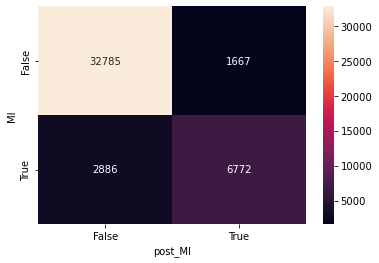

In [145]:
matrix = confusion_matrix(final['MI'], final['post_MI'])

ax= plt.subplot()
sn.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('post_MI');ax.set_ylabel('MI'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

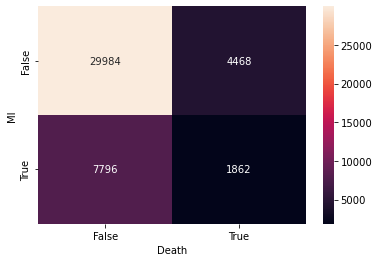

In [146]:
matrix = confusion_matrix(final['MI'], final['actualhospitalmortality'])

ax= plt.subplot()
sn.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Death');ax.set_ylabel('MI'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

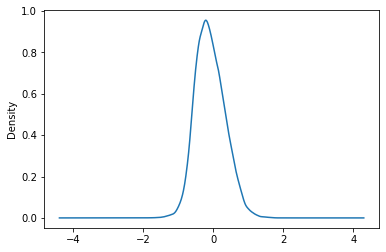

In [151]:
ax = final['noninvasivesystolic_mean'].plot.kde()

# Results

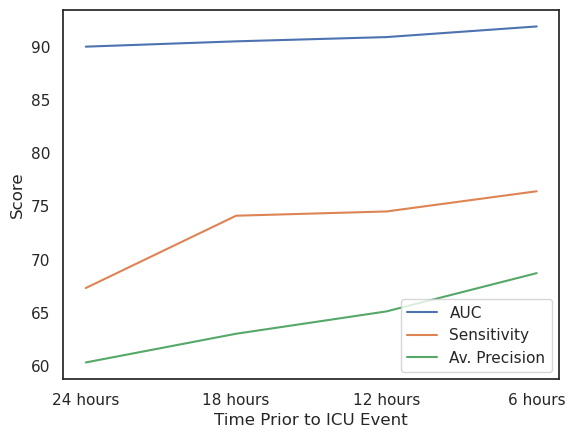

In [14]:
sn.set_theme(style="white")

Time = ['6 hours', '12 hours', '18 hours', '24 hours']
AUC = [91.9, 90.9, 90.5, 90.0]
Sensitivity = [76.4, 74.5, 74.1, 67.3]
F1 = [91.2, 90.5, 90.4, 89.7]
AP = [68.7, 65.1, 63.0, 60.3]

Time.reverse()
AUC.reverse()
Sensitivity.reverse()
AP.reverse()

my_dict = dict(x=Time,y=AUC,z=Sensitivity, e=AP)
data = pd.DataFrame (my_dict)
fig, ax = plt.subplots()
ax= sn.lineplot(x='x', y='y', data=data, label='AUC')
ax1 = sn.lineplot(x='x', y='z', data=data, label='Sensitivity')
ax3 = sn.lineplot(x='x', y='e', data=data, label='Av. Precision')
ax.set_xlabel("Time Prior to ICU Event")
ax.set_ylabel("Score")
plt.show()
fig.savefig("Time_XMI.png", bbox_inches='tight', dpi=600)

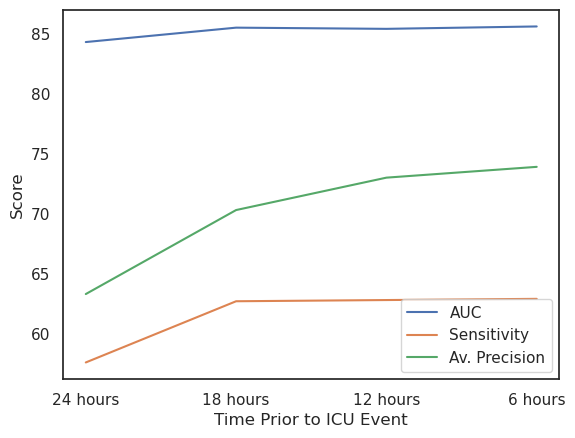

In [15]:
sn.set_theme(style="white")

Time = ['6 hours', '12 hours', '18 hours', '24 hours']

AUC = [85.6, 85.4, 85.5, 84.3]

Sensitivity = [62.9, 62.8, 62.7, 57.6]

F1 = [82.5, 88.1, 86.1, 84.8]
AP = [73.9, 73.0, 70.3, 63.3]
Time.reverse()
AUC.reverse()
Sensitivity.reverse()
AP.reverse()

my_dict = dict(x=Time,y=AUC,z=Sensitivity, e=AP)
data = pd.DataFrame (my_dict)
fig, ax = plt.subplots()
ax= sn.lineplot(x='x', y='y', data=data, label='AUC')
ax1 = sn.lineplot(x='x', y='z', data=data, label='Sensitivity')
ax3 = sn.lineplot(x='x', y='e', data=data, label='Av. Precision')
ax.set_xlabel("Time Prior to ICU Event")
ax.set_ylabel("Score")
plt.show()
fig.savefig("Time_XMI_MI.png", bbox_inches='tight', dpi=600)

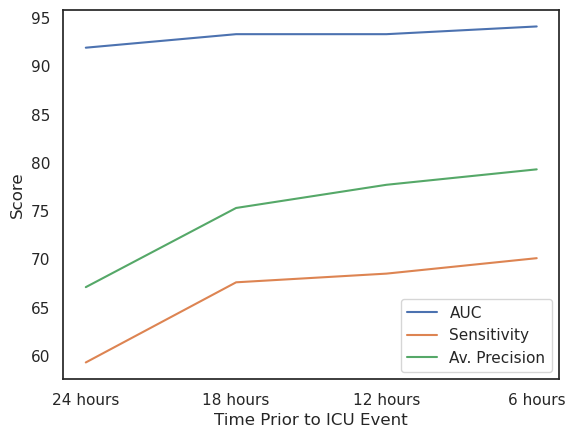

In [16]:
sn.set(style="white")

Time = ['6 hours', '12 hours', '18 hours', '24 hours']
AUC = [94.1, 93.3, 93.3, 91.9]
Sensitivity = [70.1, 68.5, 67.6, 59.3]
AP = [79.3, 77.7, 75.3, 67.1]

Time.reverse()
AUC.reverse()
Sensitivity.reverse()
AP.reverse()

my_dict = dict(x=Time,y=AUC,z=Sensitivity, e=AP)
data = pd.DataFrame (my_dict)
fig, ax = plt.subplots()
ax= sn.lineplot(x='x', y='y', data=data, label='AUC')
ax1 = sn.lineplot(x='x', y='z', data=data, label='Sensitivity')
ax3 = sn.lineplot(x='x', y='e', data=data, label='Av. Precision')
ax.set_xlabel("Time Prior to ICU Event")
ax.set_ylabel("Score")
plt.show()
fig.savefig("Time_XMI_MIMIC.png", bbox_inches='tight', dpi=600)

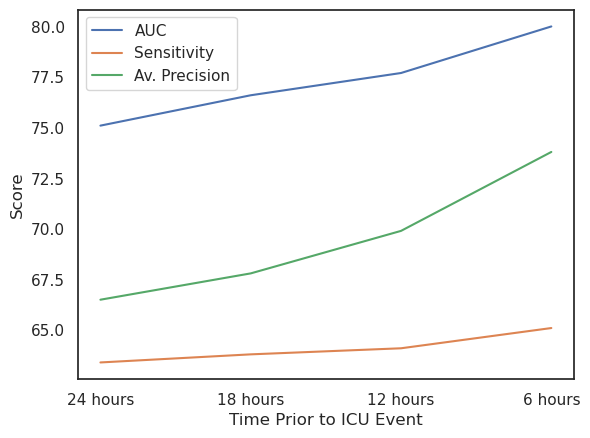

In [17]:
sn.set(style="white")

Time = ['6 hours', '12 hours', '18 hours', '24 hours']
AUC = [80.0, 77.7, 76.6, 75.1]
Sensitivity = [65.1, 64.1, 63.8, 63.4]
AP = [73.8, 69.9, 67.8, 66.5]

Time.reverse()
AUC.reverse()
Sensitivity.reverse()
AP.reverse()

my_dict = dict(x=Time,y=AUC,z=Sensitivity, e=AP)
data = pd.DataFrame (my_dict)
fig, ax = plt.subplots()
ax= sn.lineplot(x='x', y='y', data=data, label='AUC')
ax1 = sn.lineplot(x='x', y='z', data=data, label='Sensitivity')
ax3 = sn.lineplot(x='x', y='e', data=data, label='Av. Precision')
ax.set_xlabel("Time Prior to ICU Event")
ax.set_ylabel("Score")
plt.show()
fig.savefig("Time_XMI_MIMIC_external.png", bbox_inches='tight', dpi=600)